###Visualization Wheel


<img src="https://ryanwingate.com/visualization/guidelines/visualization-wheel/cairo-visualization-wheel.jpg" width="800">


See more in work of Alberto Cairo on http://www.thefunctionalart.com/


#Qualities of good data visualization

##1) Truthful

<img src="https://heap.io/wp-content/uploads/2016/12/misleading1_yaxis.png" width="800">

##2) Functionality

<img src="https://images.squarespace-cdn.com/content/v1/56713bf4dc5cb41142f28d1f/1452593931962-ADKY4GZP8GE3UAMEPADX/ke17ZwdGBToddI8pDm48kPTmLCYI3azk0b44ISZKpQNZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpzMx-NIgOy-55tVg9z7UZkVgiIW24uP_Lvr_-BmgSUFsZXzRgzYKtZb9_ZW_5JeO3Y/data-ink.gif?format=750w" width="800">

##3) Beauty

<img src="https://cntsyncont.images.worldnow.com/images/18775489_G.jpg" width="800">

https://www.darkhorseanalytics.com/

##4) Insightful

<img src="https://image.cnbcfm.com/api/v1/image/106613193-1594641332757-20200713_us_new_cases_curve.png?v=1594641585&w=678&h=321" width="800">

##5) Enlightening

- A combination of the previous four, but with a social ethical responsibility

#Basic space data types

##1) Time dependent data

Time series of AMON data

<img src="https://www.dropbox.com/s/30qbrezwn5cxvuo/amon_2020-05-21.png?dl=1" width="1200">

##2) Position dependent data 

Images of Allsky Airglow Camera

<img src="https://www.dropbox.com/s/rgh50saokecws0y/aac_2020-05-21_21-59-47.png?dl=1" width="1200">


##3) Physical quantity dependent data (wavelength, energy, etc.)

<img src="https://www.dropbox.com/s/kt9hxt7jmnmbung/spec_aok_2019-10-31.png?dl=1" width="1200">


## Excercise 0

Print "Hello world"

Steps:
- open your favorite environmet
- write a simple code
- execute it

Bonus: 
- make a dictionary with "Hello world" in 3 different languages. Print "Hello world" in language that was selected during discussion with simple chatbot. 

In [ ]:
# write your code here

## Solution 0

In [ ]:
print('Hello world')

Hello world


## Excerciese I.

Reproduce the figure "Time series of AMON data"

Steps:
- import libraries
- load data and process them
- plot data (keep in mind qualities of good data visualization)

Bonus:
- play with ranges, rolling mean interval, and etc. to catch the airglow variability
- create histograms for time 21:00 - 22:00 and 22:00 - 23:00 and compare them
- create boxplot with boxes for each 10 minutes

In [ ]:
# write your code here

##Solution I.

In [ ]:
## import libraries

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
plt.style.use('dark_background')

In [ ]:
# mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
# set the root path
root_path = '/content/gdrive/My Drive/SPACE-ML/SPACE-LAB_summer_school/SLSS_2020/presentations/Mon/'
print('Your root path is: ' + root_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Your root path is: /content/gdrive/My Drive/SPACE-ML/SPACE-LAB_summer_school/SLSS_2020/presentations/Mon/


In [ ]:
## load data and process them

# load data to Pandas Data Frame
amon_file = root_path + 'amon_sample.txt'
dfa = pd.read_fwf(amon_file, names=['amon_date', 'amon_time', 'amon_data'], skiprows=1, na_values='x')
dfa.head()

# join date and time
dfa.amon_time = pd.to_datetime(dfa.amon_date.astype(str)+' '+dfa.amon_time.astype(str))
dfa.drop(['amon_date'], axis=1, inplace=True)
dfa.set_index('amon_time', inplace=True)
print(dfa.head())

# calculate the rolling mean and store it to ne DF
dfar = dfa.rolling(window=300).mean()
print(dfar.tail())

                      amon_data
amon_time                      
2020-05-21 20:50:00  175.666667
2020-05-21 20:50:01  180.000000
2020-05-21 20:50:02  186.000000
2020-05-21 20:50:03  183.666667
2020-05-21 20:50:04  199.000000
                      amon_data
amon_time                      
2020-05-21 23:09:56  168.095556
2020-05-21 23:09:57  168.122222
2020-05-21 23:09:58  168.157778
2020-05-21 23:09:59  168.088889
2020-05-21 23:10:00  168.067778


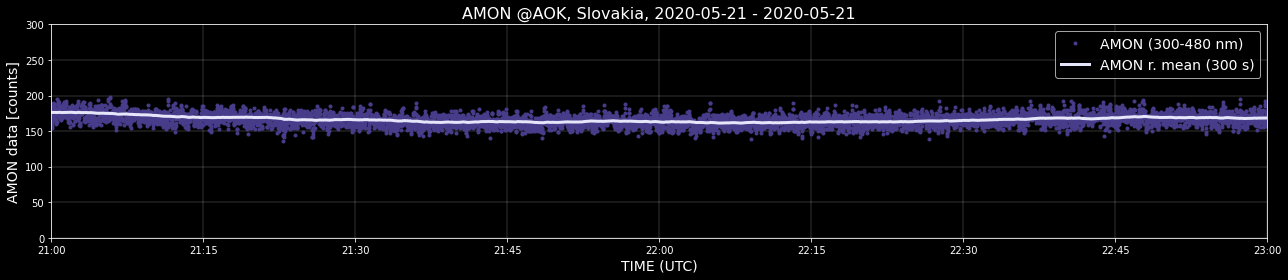

In [ ]:
## plot data

# select desired time interval
start_time = datetime.datetime.strptime('2020-05-21 21:00', "%Y-%m-%d %H:%M")
end_time = datetime.datetime.strptime('2020-05-21 23:00', "%Y-%m-%d %H:%M")

# Plot data frame of AMON data (dfa)
plt.figure(figsize=(18, 4))
plt.title('AMON @AOK, Slovakia, ' + str(start_time)[:10] + ' - ' + str(end_time)[:10], fontsize=16)
plt.xlabel('TIME (UTC)', fontsize=14)
plt.ylabel('AMON data [counts]', fontsize=14)
plt.xlim(start_time, end_time)
plt.ylim(0, 300)
ax = plt.gca()
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dfa.index, dfa.amon_data, '.', color='darkslateblue', label='AMON (300-480 nm)')
plt.plot(dfar.index, dfar.amon_data, color='lavender', label='AMON r. mean (300 s)', linewidth=3)
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.grid(linewidth=0.2)
plt.show()

## Excerciese II.

Reproduce the figure "Images of Allsky Airglow Camera"

Steps:
- import libraries
- load data (.fits format) and process them
- plot data (keep in mind qualities of good data visualization)

Bonus:
- play with ranges to catch the airglow variability
- create histograms for each filter and compare them
- create cuts through field-of-view to recognize variability 

In [ ]:
# write your code here

##Solution II.

In [ ]:
## import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from dateutil.parser import parse
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
plt.style.use('dark_background')

In [ ]:
# mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
# set the root path
root_path = '/content/gdrive/My Drive/SPACE-ML/SPACE-LAB_summer_school/SLSS_2020/presentations/Mon/'
print('Your root path is: ' + root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Your root path is: /content/gdrive/My Drive/SPACE-ML/SPACE-LAB_summer_school/SLSS_2020/presentations/Mon/


In [ ]:
## load data and process them

# load data to astropy header and numpy array
aac_file = root_path + 'aac_sample.fits'
image_hdr3 = fits.getheader(aac_file, 3)
image_data3 = fits.getdata(aac_file, 3)

# improve the date and time format for the name of image
parsed_time = parse(image_hdr3['DATE-OBS'], fuzzy=True)
str_time = parsed_time.strftime("%Y-%m-%d_%H-%M-%S")


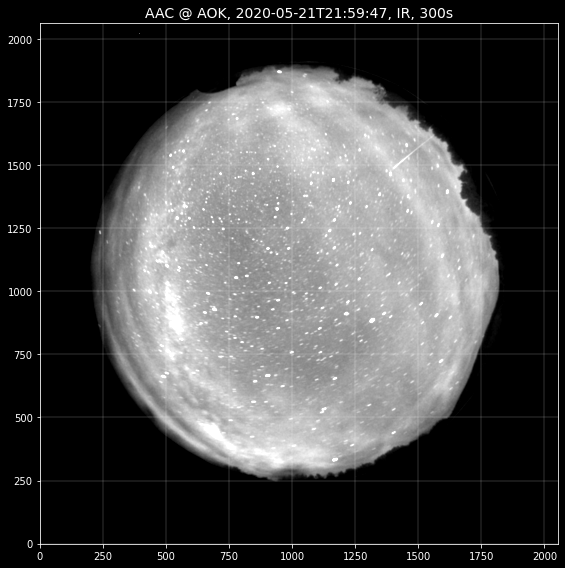

In [ ]:
## plot data

plt.figure(figsize=(24, 8))
#gridspec.GridSpec(1, 4)
#plt.subplot2grid((1, 4), (0, 3), colspan=1)
plt.title('AAC @ AOK, ' + image_hdr3['DATE-OBS'] + ', ' + image_hdr3['FILTER']
          + ', ' + str(image_hdr3['EXPTIME']) + 's', fontsize=14)
plt.imshow(image_data3, cmap='gray', vmin=np.percentile(image_data3, 50), vmax=np.percentile(image_data3, 99),
            interpolation="bicubic", origin='lower')
plt.tight_layout()
#plt.xticks([])
#plt.yticks([])
plt.grid(linewidth=0.2)
#plt.colorbar()
plt.show()